In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os

In [25]:
eff = [[903.715, 0.298],
[895.975, 0.774],
[866.563, 8.725],
[826.316, 41.192],
[628.173, 65.285],
[490.402, 76.117],
[389.783, 29.790],
[330.960, 16.122],
[296.904, 1.978]]
eff = np.array(eff)
eff[:, 1] = (eff[:, 1]*124)/(eff[:, 0]*100)
np.set_printoptions(suppress=True, precision=5, floatmode='fixed')
eff[:, 1].astype(float)

array([0.00041, 0.00107, 0.01248, 0.06181, 0.12887, 0.19246, 0.09477,
       0.06040, 0.00826])

# Data

In [2]:
filename = ['', '']

path = '/home/investigator/mariandbt/python/data/'
path = path + '20230207/'

filename[0] = os.path.join(path, 'fiber_espectrum.csv') 
filename[1] = os.path.join(path, 'pmt_sensitivity.csv') 


In [3]:
fiber_espectrum = []
with open(filename[0],'r', encoding='ascii') as fp:
    for i, line in enumerate(fp):
        fiber_espectrum.append(np.asarray(line.replace('\n',' ').split(','), dtype=float))
        
fp.close()

fiber_espectrum = np.array(fiber_espectrum)

In [21]:
pmt_sensitivity = []
with open(filename[1],'r', encoding='ascii') as fp:
    for i, line in enumerate(fp):
        pmt_sensitivity.append(np.asarray(line.replace('\n',' ').split(','), dtype=float))
        
fp.close()

pmt_sensitivity = np.array(pmt_sensitivity)

# from sensitivity to QE
wavelength = pmt_sensitivity[:, 0]
pmt_qe = (pmt_sensitivity[:, 1]*124)/(wavelength*100)

In [18]:
# fiber_espectrum
# pmt_sensitivity[:, 1] = pmt_sensitivity[:, 1]*124/pmt_sensitivity[:, 0]
pmt_sensitivity[:, 1]

array([2.331600e-01, 2.961200e-01, 5.509600e-01, 1.008950e+00,
       2.000810e+00, 2.931930e+00, 4.031360e+00, 1.015249e+01,
       1.396274e+01, 1.773704e+01, 2.183062e+01, 2.687513e+01,
       4.552311e+01, 6.680774e+01, 7.847332e+01, 7.495580e+01,
       6.933685e+01, 6.830453e+01, 6.317695e+01, 6.032780e+01,
       5.669102e+01, 5.242025e+01, 4.696328e+01, 3.644866e+01,
       2.737989e+01, 2.056515e+01, 1.276095e+01, 6.337020e+00,
       4.610100e+00, 3.097230e+00, 2.015640e+00, 1.083810e+00,
       5.049900e-01, 2.352900e-01, 1.436900e-01, 6.486000e-02,
       3.717000e-02, 2.235000e-02])

In [20]:
wavelength

array([276.97842, 284.17266, 288.48921, 292.80576, 298.56115, 301.43885,
       304.31655, 315.82734, 324.46043, 337.41007, 356.11511, 380.57554,
       425.17986, 465.46763, 510.07194, 557.55396, 599.28058, 622.30216,
       661.15108, 701.43885, 738.84892, 770.5036 , 807.91367, 838.1295 ,
       848.20144, 855.39568, 862.58993, 871.22302, 875.53957, 879.85612,
       884.17266, 891.36691, 898.56115, 905.7554 , 911.51079, 923.02158,
       933.09353, 944.60432])

In [19]:
pmt_qe

array([1.04383006e-01, 1.29213275e-01, 2.36816621e-01, 4.27279163e-01,
       8.30987019e-01, 1.20607984e+00, 1.64266005e+00, 3.98606644e+00,
       5.33618155e+00, 6.51845678e+00, 7.60146594e+00, 8.75651683e+00,
       1.32764182e+01, 1.77974992e+01, 1.90770966e+01, 1.66701698e+01,
       1.43468180e+01, 1.36103685e+01, 1.18489435e+01, 1.06647175e+01,
       9.51437606e+00, 8.43618511e+00, 7.20800617e+00, 5.39252447e+00,
       4.00271233e+00, 2.98116843e+00, 1.83442647e+00, 9.01939529e-01,
       6.52914408e-01, 4.36499231e-01, 2.82681620e-01, 1.50771179e-01,
       6.96878115e-02, 3.22117428e-02, 1.95472837e-02, 8.71338241e-03,
       4.93956913e-03, 2.93392687e-03])

# Interpolation

In [22]:
x = np.linspace(200, 1e3, num=int(1e5))
y = np.interp(x, wavelength, pmt_qe)

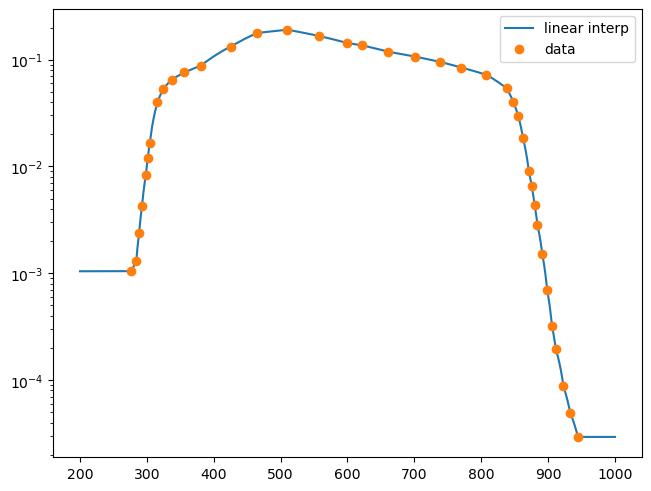

In [23]:
# fig, ax = plt.subplots(1, 1, figsize = (4, 4.5), constrained_layout=True)
fig, ax = plt.subplots(1, 1, constrained_layout=True)

ax.plot(x, y, '-', label='linear interp')

ax.plot(wavelength, pmt_qe, 'o', label='data')
ax.legend(loc='best')

ax.set_yscale('log')

In [24]:
np.interp(425, wavelength, pmt_qe)

0.1325819241871008

In [25]:
x = np.linspace(450, 600, num=int(1e5))
y = np.interp(x, fiber_espectrum[:, 0], fiber_espectrum[:, 1])

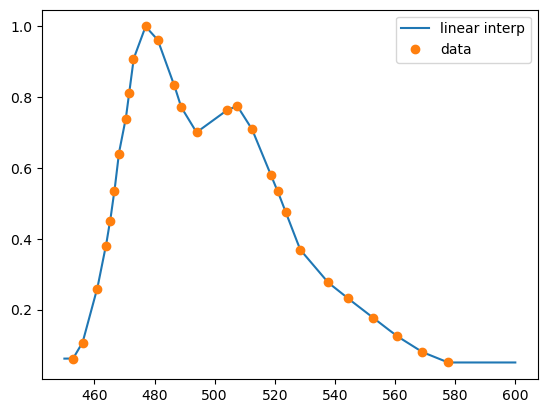

In [26]:
plt.plot(x, y, '-', label='linear interp')

plt.plot(fiber_espectrum[:, 0], fiber_espectrum[:, 1], 'o', label='data')
plt.legend(loc='best')

plt.show()

In [27]:
(fiber_espectrum[:, 0]*fiber_espectrum[:, 1]).sum()
len(fiber_espectrum)
np.shape(fiber_espectrum)

(28, 2)

In [28]:
np.array([1, 2, 3])*np.array([1, 2, 3]), (np.array([1, 2, 3])*np.array([1, 2, 3])).sum() # prod escalar de vertores
# np.array([1, 2, 3])/2
np.array([1, 2, 3])/np.array([1, 2, 3])

array([1., 1., 1.])

In [29]:
fiber_integr = []
xx_mean = []

for i in range(len(fiber_espectrum) - 1):
    xx = fiber_espectrum[i:(i+2), 0].copy()
    yy = fiber_espectrum[i:(i+2), 1].copy()
    
    integr = np.trapz(yy, x=xx)
    
    fiber_integr.append(integr)
#     print(xx, yy, integr)
    xx_mean.append(xx.mean())
    
fiber_integr = np.array(fiber_integr)
xx_mean = np.array(xx_mean)

# print('Raw fiber espectrum integral = ', fiber_integr)

full_integr = np.trapz(fiber_espectrum[:, 1], x=fiber_espectrum[:, 0])
fiber_integr = fiber_integr/full_integr

# print('\nNormalised fiber espectrum integral = ', fiber_integr)


[452.87356 456.03448] [0.06186 0.10671] 0.266418142199998
[456.03448 460.91954] [0.10671 0.25864] 0.8923783355000017
[460.91954 463.7931 ] [0.25864 0.37818] 0.9149702395999991
[463.7931  465.22989] [0.37818 0.4504 ] 0.5952477291000127
[465.22989 466.66667] [0.4504  0.53506] 0.7079446093999995
[466.66667 468.10345] [0.53506 0.63964] 0.8438927329999993
[468.10345 470.4023 ] [0.63964 0.73677] 1.5820800642500108
[470.4023  471.55172] [0.73677 0.81147] 0.8897890103999719
[471.55172 472.98851] [0.81147 0.9061 ] 1.233893700150026
[472.98851 477.01149] [0.9061  0.99826] 3.8306010963999633
[477.01149 481.03448] [0.99826 0.96097] 3.940981348849993
[481.03448 486.49425] [0.96097 0.83406] 4.900225471550044
[486.49425 488.7931 ] [0.83406 0.77185] 1.8458731017499672
[488.7931  493.96552] [0.77185 0.69972] 3.8057890497000333
[493.96552 504.02299] [0.69972 0.76208] 7.351004822999975
[504.02299 507.47126] [0.76208 0.77457] 2.649392047749984
[507.47126 512.35632] [0.77457 0.7099 ] 3.625862509100007
[512

In [30]:
pmt_convolution = np.interp(xx_mean, wavelength, pmt_qe)

In [31]:
pmt_convolution

array([0.16561555, 0.17013014, 0.17448349, 0.17690202, 0.17811288,
       0.17852506, 0.17906089, 0.17955551, 0.17992647, 0.18070961,
       0.18186372, 0.18322391, 0.1843368 , 0.18540847, 0.18759303,
       0.18953027, 0.1907256 , 0.18801067, 0.1858257 , 0.18458755,
       0.18269391, 0.17912512, 0.17511934, 0.17133206, 0.16718061,
       0.16266772, 0.15794769])

In [32]:
len(pmt_convolution), len(fiber_integr)

(27, 27)

In [33]:
QE_Y11 = (pmt_convolution*fiber_integr).sum()
QE_Y11

0.18231454955536272